In [87]:
# Import module
import math
import matplotlib.pyplot as plt

def throw(goal):
    x_list, y_list = [], []

# Constant
    Q = (((0.0, 5.0), 10.0), ((5.0, -5.0), 5.0)) # Position and value of charge
    TIMELIMIT = 5.0 # Simulation termination time
    RLIMIT = 0.1 # Minimum value of distance r
    H = 0.01 # Time step
# Main execution part
    t = 0.0 # Time t
# Coefficient input
    vx = float (input ("Please input initial speed v0x:"))
    vy = float (input ("Please input initial speed v0y: "))
    x = float (input ("Please enter the initial position x: "))
    y = float (input ("Please enter the initial position y: "))
    # vx, vy, x, y = 1,1,5,1
    # print ("{:.7f} {:.7f} {:.7f} {:.7f} {:.7f}".format (t, x, y, vx, vy))
# Current time and current position
# Calculate 2D motion
    d_best = None
    t_best = None
    x_best, y_best = (None, None)
    while t + H <= TIMELIMIT: # Calculate until censoring time
        t = t + H # Update time
        rmin = float ("inf") # Initialize minimum distance
        for qi in Q:
            rx = qi [ 0] [0]-x # Calculate distance rx
            ry = qi [0] [1]-y # Calculate distance ry
            r = math.sqrt (rx * rx + ry * ry) # Calculate distance r


            if r < rmin:
                rmin = r # update minimum distance
            vx += (rx / r / r / r * qi [1]) * H # calculate velocity vx
            vy += (ry / r / r / r * qi [ 1]) * H # Calculation of velocity vy
            x += vx * H # Calculation of position x
            y += vy * H # Calculation of position y
            x_list.append(x)
            y_list.append(y)
            # print ("{:.7f} {:.7f} {:.7f} {:.7f} {:.7f} ".format (t, x, y, vx, vy))
            # Current time and current position
            if rmin <RLIMIT:
                break # End if you are very close to the charge

        d = math.sqrt((x - goal[0]) ** 2 + (y - goal[1]) ** 2)
        if d_best is None  or  d < d_best:
            d_best = d
            t_best = t
            x_best, y_best = x, y
            
            
    return Q, x_list, y_list, d_best, t_best, x_best, y_best
# End of efield.py

Distance = 0.5213447024954918
Score = 4.1495209422360375


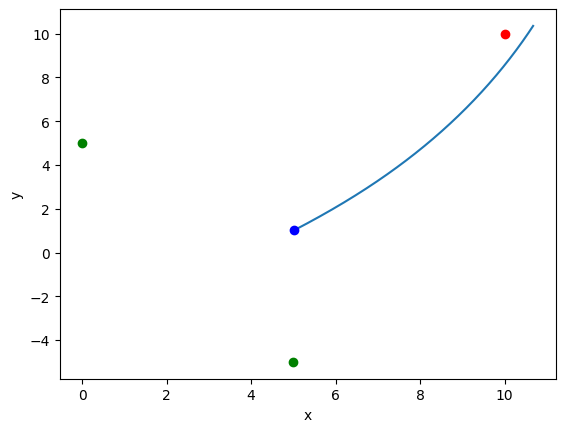

In [88]:
goal = (10.0, 10.0)
goal_range = 1.0

fig, ax = plt.subplots()
Q, x_list, y_list, d_best, t_best, x_best, y_best = throw(goal)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot(x_list, y_list)
ax.plot(x_list[0], y_list[0], marker="o", color="b")
ax.plot(Q[0][0][0], Q[0][0][1], marker="o", color="g")
ax.plot(Q[1][0][0], Q[1][0][1], marker="o", color="g")
ax.plot(goal[0], goal[1], marker="o", color="r")
# ax.plot([x_best, goal[0]], [y_best, goal[1]], marker=".", color="orange")
# fig.show()

# 点数を計算
if d_best < goal_range:
    eps = 1e-9
    score = min([math.sqrt(t_best) / (d_best + eps), 10])
else:
    score = 0

print(f"Distance = {d_best}\nScore = {score}")




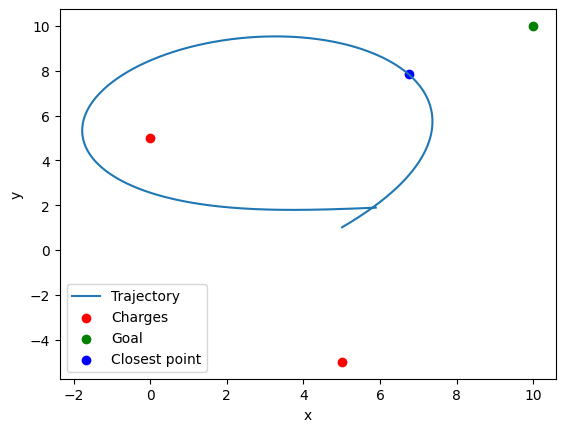

In [89]:
import math
import matplotlib.pyplot as plt

def throw(goal):
    x_list, y_list = [], []

    # Constant
    Q = (((0.0, 5.0), 10.0), ((5.0, -5.0), 5.0)) # Position and value of charge
    TIMELIMIT = 20.0 # Simulation termination time
    RLIMIT = 0.1 # Minimum value of distance r
    H = 0.01 # Time step
    # Main execution part
    t = 0.0 # Time t
    # Coefficient input
    vx, vy, x, y = 1, 1, 5, 1

    d_best = None
    t_best = None
    x_best, y_best = None, None
    
    while t + H <= TIMELIMIT: # Calculate until termination time
        t += H # Update time
        rmin = float("inf") # Initialize minimum distance
        ax, ay = 0.0, 0.0 # Initialize accelerations

        for qi in Q:
            rx = qi[0][0] - x # Calculate distance rx
            ry = qi[0][1] - y # Calculate distance ry
            r = math.sqrt(rx * rx + ry * ry) # Calculate distance r

            if r < rmin:
                rmin = r # update minimum distance

            ax += (rx / r**3 * qi[1]) # calculate acceleration ax
            ay += (ry / r**3 * qi[1]) # calculate acceleration ay

        if rmin < RLIMIT:
            break # End if very close to the charge

        vx += ax * H # update velocity vx
        vy += ay * H # update velocity vy
        x += vx * H # update position x
        y += vy * H # update position y

        x_list.append(x)
        y_list.append(y)

        d = math.sqrt((x - goal[0]) ** 2 + (y - goal[1]) ** 2)
        if d_best is None or d < d_best:
            d_best = d
            t_best = t
            x_best, y_best = x, y

    return Q, x_list, y_list, d_best, t_best, x_best, y_best
# End of throw function

# Example usage
goal = (10, 10)
Q, x_list, y_list, d_best, t_best, x_best, y_best = throw(goal)

# Plotting the trajectory
plt.plot(x_list, y_list, label="Trajectory")
plt.scatter(*zip(*[(q[0][0], q[0][1]) for q in Q]), color='red', label='Charges')
plt.scatter([goal[0]], [goal[1]], color='green', label='Goal')
plt.scatter([x_best], [y_best], color='blue', label='Closest point')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()